<a href="https://colab.research.google.com/github/srikarraju/GridWorld/blob/main/Natural_Actor_Critic_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions import Categorical
import gym
from collections import deque
import numpy as np

In [ ]:
env = gym.make('CartPole-v0')

returns = deque(maxlen=100)
weights_v = np.zeros(4,dtype=float)
e_traces = np.zeros(4,dtype = float)
weights_p = np.zeros(6,dtype=float)
print(weights_v)
print(weights_p)

[0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]


In [ ]:
alpha_0, beta_0, gamma, epsilon = 0.1, 0.01, 0.95, 0.1
alpha_c, beta_c = 1000, 100000
t = 0
n_episode = 1
actions_list = []
avg_reward = 0
episode_rewards = []
lamda = 0.9

while n_episode <=500000:
  rewards,states,actions = [],[],[]
  state = env.reset()

  while True:
    t += 1
    state_action_features = np.zeros((2,6),dtype=float)
    state = np.asarray(state)
    for i in range(4):
      state_action_features[0][i] = state[i]
      state_action_features[1][i] = state[i]
    state_action_features[0][4] = 1
    state_action_features[1][5] = 1
    probs = np.dot(np.asarray(state_action_features),weights_p)
    probs -= probs.max()
    probs = np.exp(np.clip(probs/epsilon, -500, 500))
    probs /= probs.sum()

    probs2 = probs.cumsum()
    action = np.where(probs2 >= np.random.random())[0][0]

    new_state, reward, done, info = env.step(action.item())

    value_curr = np.dot(weights_v,np.asarray(state))
    value_next = np.dot(weights_v,np.asarray(new_state))

    beta = (beta_0 * beta_c) / (beta_c + t)
    alpha = (alpha_0 * alpha_c) / (alpha_c + t**(2/3))

    avg_reward = (1 - gamma*alpha)*avg_reward + gamma*alpha * reward

    td_error = reward + value_next- value_curr - avg_reward

    weights_v += alpha * td_error * np.asarray(state)
    #weights_v += alpha * td_error * e_traces
    #e_traces = gamma*lamda * e_traces + np.asarray(state)

    weights_p += beta * td_error * (1 - probs[action]) * np.asarray(state_action_features[action])

    states.append(state)
    actions.append(action)
    rewards.append(reward)
    actions_list.append(action)

    state = new_state
    if done==True:
      break

  returns.append(np.sum(rewards))
  episode_rewards.append(np.sum(rewards))
  #print(np.sum(rewards))
  if n_episode%100==0:
    print("Episode: {:6d}\tAvg. Return: {:6.2f}".format(n_episode, np.mean(returns)))
  #reinforce_baseline_returns.append(np.mean(returns))
  n_episode += 1

env.close()

Episode:    100	Avg. Return:  10.05
Episode:    200	Avg. Return:   9.28
Episode:    300	Avg. Return:   9.27
Episode:    400	Avg. Return:   9.37
Episode:    500	Avg. Return:   9.43
Episode:    600	Avg. Return:   9.31
Episode:    700	Avg. Return:   9.25
Episode:    800	Avg. Return:   9.39
Episode:    900	Avg. Return:   9.35
Episode:   1000	Avg. Return:   9.28
Episode:   1100	Avg. Return:   9.25
Episode:   1200	Avg. Return:   9.34
Episode:   1300	Avg. Return:   9.44
Episode:   1400	Avg. Return:   9.26
Episode:   1500	Avg. Return:   9.42
Episode:   1600	Avg. Return:   9.46
Episode:   1700	Avg. Return:   9.35
Episode:   1800	Avg. Return:   9.54
Episode:   1900	Avg. Return:   9.34


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars


IndexError: ignored

In [ ]:
print(weights_v)

[-inf -inf  inf  inf]


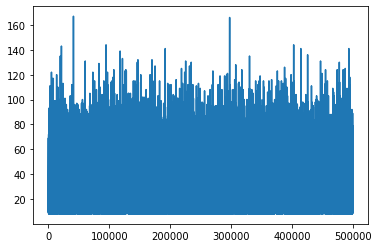

In [ ]:
from matplotlib import pyplot as plt

plt.plot(episode_rewards)
plt.show()

In [ ]:
print(actions_list[-25:])

[1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0]


In [ ]:
alpha, beta = 0.0001, 0.0001
n_episode = 1
actions_list = []

while n_episode <=5000:
  rewards,states,actions = [],[],[]
  state = env.reset()

  value_curr = 0
  for i in range(len(weight_vector)):
      value_curr += weight_vector[i]*state[i]
  print(value_curr)

  #print(value_fn(torch.tensor(state).unsqueeze(0).float()))
  #print(policy(torch.tensor(state).unsqueeze(0).float()))
  while True:
    probs = policy(torch.tensor(state).unsqueeze(0).float())
    sampler = Categorical(probs)
    action = sampler.sample()
    new_state, reward, done, info = env.step(action.item())


    value_curr, value_next = 0, 0
    #print(weight_vector,state,new_state)
    for i in range(len(weight_vector)):
      value_curr += weight_vector[i]*state[i]
      value_next += weight_vector[i]*new_state[i]

    #td_error = reward + value_fn(torch.tensor(new_state).float()).float() - value_fn(torch.tensor(state).float()).float()
    #td_error = td_error.detach()

    td_error = reward + value_curr - value_next
    #print(td_error)

    for i in range(len(weight_vector)):
      weight_vector[i] += alpha*td_error.item()*state[i]



    #value_net_loss = -alpha*td_error*value_fn(torch.tensor(state).float())
    #optimizer2.zero_grad()
    #value_net_loss.backward()
    #optimizer2.step()


    #print(-sampler.log_prob(action))

    loss_comp = -sampler.log_prob(action)

    #policy_net_loss = beta*torch.mul(td_error,loss_comp)
    policy_net_loss = beta*td_error*loss_comp
    #print(policy_net_loss)

    optimizer1.zero_grad()
    policy_net_loss.backward()
    optimizer1.step()


    states.append(state)
    actions.append(action)
    rewards.append(reward)
    actions_list.append(action)

    state = new_state
    if done==True:
      break

  returns.append(np.sum(rewards))
  #print(np.sum(rewards))
  if n_episode%100==0:
    print("Episode: {:6d}\tAvg. Return: {:6.2f}".format(n_episode, np.mean(returns)))
  #reinforce_baseline_returns.append(np.mean(returns))
  n_episode += 1

env.close()

Streaming output truncated to the last 5000 lines.
-0.0036363508221772776
0.005242142107167129
0.014492084298329296
0.0010657402982180274
-0.025837696901905405
-0.03585526721664305
0.034278071374478455
0.025001580639522226
-0.040214175260983885
0.020511651486182815
-0.009864880101295746
0.040904898574749854
-0.007543188714645205
-0.0033569775435318616
0.026800901148491513
0.018319676601625187
0.030596257568554233
-0.02474145386696303
-0.025490219015362366
0.05889274185978677
0.03284275345626092
-0.009866196217687945
-0.033196023110794545
0.008969330620790765
0.046158498023542355
0.010500975163179124
-0.018938457933183772
-0.03493787335977318
0.006958780706812226
0.009374661447164388
0.027329052556234038
-0.028025777992353874
-0.019062434041284153
-0.039880918847736264
0.011124173112973496
0.009636572760784508
-0.025906570988043262
0.01026829032606237
0.03237953497229371
-0.009077211720980952
0.03283490655295024
0.021355723868981363
6.683370229895302e-05
-0.026918818982458324
-0.0246057

In [ ]:
import numpy as np

policy = np.asarray([-0.3, -0.7])

policy[1] += 1

features = np.asarray([1,2,3,4])
features = np.reshape(features,(features.size,1))
features = np.repeat(features,2,axis = 1)

compatFeatures = np.dot(features, np.diag(policy))

print(compatFeatures)

[[-0.3  0.3]
 [-0.6  0.6]
 [-0.9  0.9]
 [-1.2  1.2]]
